# Setup for questions:

In [11]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [12]:
# Given data for small-sized rice bags
weights = np.array([5.2, 4.9, 5.5, 5.0, 5.8, 5.3, 5.1, 5.6, 4.7, 5.4, 5.0, 
                     5.7, 5.2, 5.1, 5.3, 5.0, 5.6, 5.2, 5.4, 5.5, 5.7, 5.1, 
                     5.8, 5.0, 5.3, 5.6, 4.9, 5.5, 5.2])

## Question 1
### Setup:

In [13]:
# Sample size
n = len(weights)

# Sample mean
sample_mean = np.mean(weights)

# Sample standard deviation
sample_std = np.std(weights, ddof=1)  # ddof=1 for sample standard deviation

# Confidence level
confidence = 0.95
alpha = 1 - confidence

# t-critical value (two-tailed, 95% confidence level, df=n-1)
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

### Answers Object:

In [14]:
# Setting the questions to be answered
question_1_results = {
    "Sample Mean": sample_mean,
    "Standard Deviation": sample_std,
    "Confidence Interval": confidence_interval
}

## Question 2
### Setup:

In [15]:
# Given data for large-sized rice bags
claimed_mean = 1.5
sample_mean_large = 1.48
sample_std_large = 0.1
n_large = 50

# Null and alternative hypotheses:
# H0: μ = 1.5 (The true mean weight is 1.5 kg)
# H1: μ < 1.5 (The true mean weight is less than 1.5 kg)

# Test statistic (t)
t_statistic = (sample_mean_large - claimed_mean) / (sample_std_large / np.sqrt(n_large))

# Given critical t-value for α = 0.05 (one-tailed) and df=49
critical_t_value = -1.676

# Decision rule
reject_null = t_statistic < critical_t_value

### Answers object:

In [16]:
# Results for Question 2
question_2_results = {
    "Test Statistic (t)": t_statistic,
    "Critical t-value": critical_t_value,
    "Reject Null Hypothesis": reject_null,
    "Conclusion": "Reject H0" if reject_null else "Fail to reject H0"
}

## Full Results
### Visualization 1:

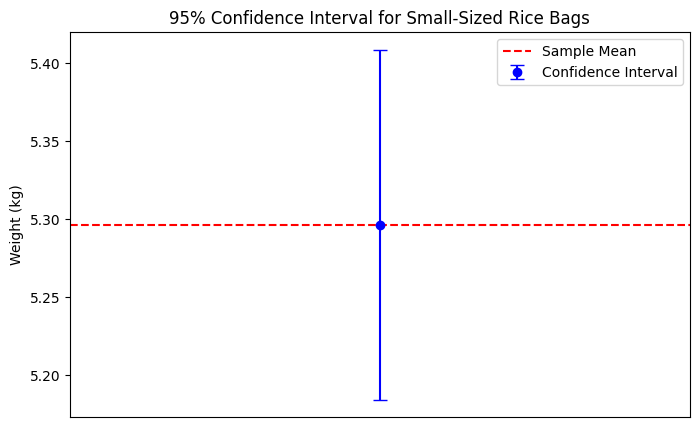

In [17]:
# Confidence Interval
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(1, sample_mean, yerr=margin_of_error, fmt='o', color='b', capsize=5, label="Confidence Interval")
ax.axhline(sample_mean, color='r', linestyle='--', label="Sample Mean")
ax.set_xlim(0.5, 1.5)
ax.set_xticks([])
ax.set_ylabel("Weight (kg)")
ax.set_title("95% Confidence Interval for Small-Sized Rice Bags")
ax.legend()
plt.show()

### Visualization 2:

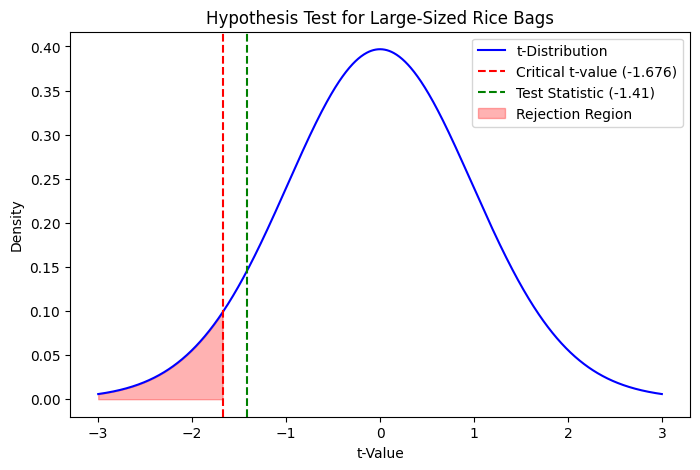

In [18]:
# Hypothesis Test
fig, ax = plt.subplots(figsize=(8, 5))

# Plot t-distribution
x = np.linspace(-3, 3, 1000)
y = stats.t.pdf(x, df=n_large-1)
ax.plot(x, y, label="t-Distribution", color='blue')

# Mark critical t-value and test statistic
ax.axvline(critical_t_value, color='red', linestyle='--', label="Critical t-value (-1.676)")
ax.axvline(t_statistic, color='green', linestyle='--', label=f"Test Statistic ({t_statistic:.2f})")

# Shade rejection region
x_fill = np.linspace(-3, critical_t_value, 200)
ax.fill_between(x_fill, stats.t.pdf(x_fill, df=n_large-1), color='red', alpha=0.3, label="Rejection Region")

ax.set_title("Hypothesis Test for Large-Sized Rice Bags")
ax.set_xlabel("t-Value")
ax.set_ylabel("Density")
ax.legend()
plt.show()